In [1]:
import struct

import numpy as np
import matplotlib.pyplot as plt

from src.cortex import NeuralNetwork, Dense, ReLU, Softmax, CrossEntropyLoss, Optimizer

In [2]:
def load_idx3_images(filename, normalize=True):
    """
    Load images from an IDX3 file into a NumPy array of shape (num_images, rows, cols).
    """
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != 2051:
            raise ValueError(f"Invalid magic number {magic} in IDX file: {filename}")

        data = np.frombuffer(f.read(), dtype=np.uint8)
        images = data.reshape(num_images, rows, cols)

    if normalize:
        images = images.astype(np.float32) / 255.0

    return images

def load_qmnist_labels(tsv_filename):
    """
    Load labels (digit only, column 0) from QMNIST TSV into a NumPy array.
    """
    labels = np.loadtxt(tsv_filename, dtype=np.int64, usecols=(0,))
    return labels

def show_image(images, labels=None, index=0):
    """
    Display a single image from the dataset.

    Parameters
    ----------
    images : np.ndarray
        Array of shape (N, H, W), e.g. QMNIST images.
    labels : np.ndarray or None
        Optional array of labels. If given, the label is shown in the title.
    index : int
        Index of the image to display.
    """
    image = images[index]

    plt.imshow(image, cmap="gray", interpolation="nearest")
    if labels is not None:
        plt.title(f"Label: {labels[index]}")
    else:
        plt.title(f"Image index: {index}")
    plt.axis("off")
    plt.show()

def one_hot(labels, num_classes):
    return np.eye(num_classes)[labels]

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Example image:


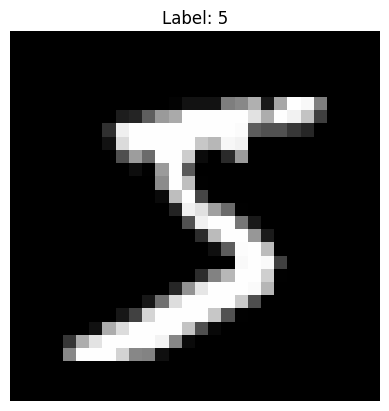

In [3]:
path = "/mnt/c/Users/areg_/Downloads/mnist"

images_train = load_idx3_images(f"{path}/qmnist-train-images-idx3-ubyte", normalize=True)
labels_train = load_qmnist_labels(f"{path}/qmnist-train-labels.tsv")
images_test = load_idx3_images(f"{path}/qmnist-test-images-idx3-ubyte", normalize=True)
labels_test = load_qmnist_labels(f"{path}/qmnist-test-labels.tsv")

print("Training data shape:", images_train.shape)
print("Training labels shape:", labels_train.shape)

print("Example image:")
show_image(images_train, labels_train, index=0)
images_train_flat = images_train.reshape(images_train.shape[0], -1)
images_test_flat = images_test.reshape(images_test.shape[0], -1)

labels_train_one_hot = one_hot(labels_train, 10)

In [18]:
nn = NeuralNetwork(
    layers=[
        Dense(784, 128),
        ReLU(),
        Dense(128, 10),
        Softmax()
    ],
    loss=CrossEntropyLoss(),
    optimizer=Optimizer(learning_rate=0.01, optimizer="Adam")
)

Training: 100%|███████████████████████████████████████████████| 10/10 [00:10<00:00,  1.04s/epoch, loss=0.476]


Predictions (first 5):



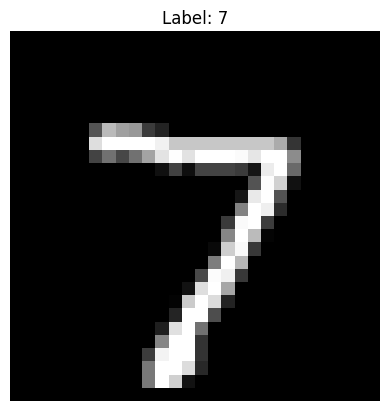

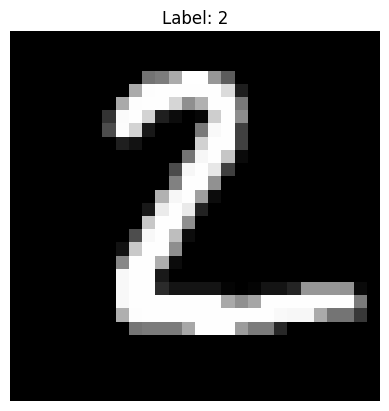

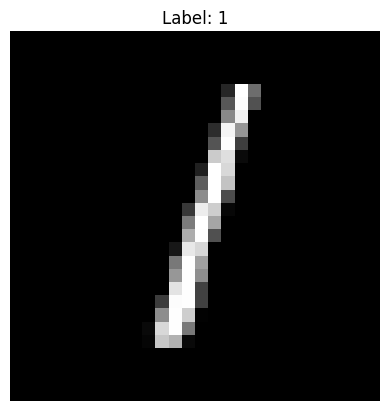

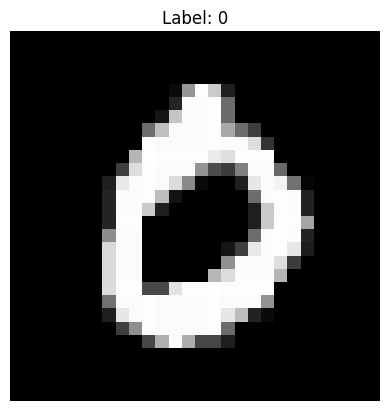

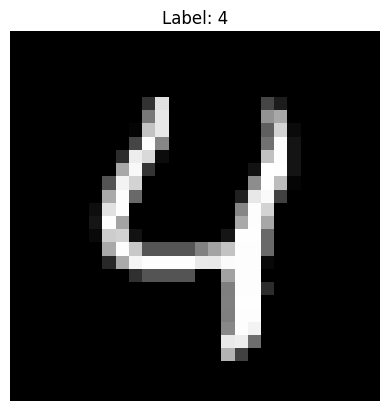

In [19]:
nn.fit(images_train_flat, labels_train_one_hot, epochs=10, learning_rate=0.01)
predictions = nn.predict(images_test_flat)
predicted_labels = np.argmax(predictions, axis=1)
print("Predictions (first 5):\n")
for i in range(5):
    show_image(images_test, predicted_labels, index=i)

In [20]:
accuracy = np.mean(np.argmax(predictions, axis=1) == labels_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.08%
